In [13]:
# load dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
import model_evaluation_utils as meu
%matplotlib inline

# load saved models
base_model = load_model('tlearn_finetune_img_aug_vgg16_base_cnn.h5')
inception_model = load_model('tlearn_finetune_img_aug_inception_100_cnn.h5')
retrain_lower_dropout = load_model('tlearn_finetune_img_aug_vgg16_0.2_dropout_cnn.h5')
lower_dropout = load_model('tlearn_finetune_img_aug_vgg16_0.15_dropout_cnn.h5')
even_lower_dropout = load_model('tlearn_finetune_img_aug_vgg16_0.1_dropout_cnn.h5')
higher_dropout = load_model('tlearn_finetune_img_aug_vgg16_0.8_dropout_cnn.h5')
adam_model = load_model('tlearn_finetune_img_aug_vgg16_adam_cnn.h5')

# load other configurations
IMG_DIM = (299, 299)
input_shape = (299, 299, 3)
num2class_label_transformer = lambda l: ['dank' if x == 0 else 'not_dank' for x in l]
class2num_label_transformer = lambda l: [0 if x == 'dank' else 1 for x in l]

In [2]:
test_files = glob.glob('data/test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])

Test dataset shape: (948, 299, 299, 3)
['dank', 'dank', 'dank', 'dank', 'dank'] [0, 0, 0, 0, 0]


In [3]:
predictions = base_model.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)

In [4]:
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.5802
Precision: 0.5874
Recall: 0.5802
F1 Score: 0.5713

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    not_dank       0.61      0.44      0.51       474
        dank       0.56      0.72      0.63       474

    accuracy                           0.58       948
   macro avg       0.59      0.58      0.57       948
weighted avg       0.59      0.58      0.57       948


Prediction Confusion Matrix:
------------------------------
                 Predicted:     
                   not_dank dank
Actual: not_dank        207  267
        dank            131  343


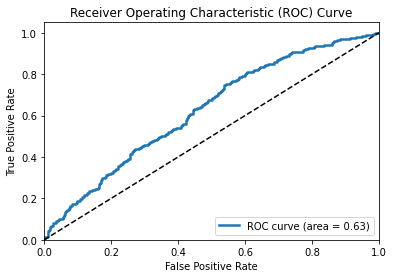

In [5]:
meu.plot_model_roc_curve(base_model, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.5327
Precision: 0.5362
Recall: 0.5327
F1 Score: 0.5212

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    not_dank       0.55      0.38      0.45       474
        dank       0.52      0.69      0.60       474

    accuracy                           0.53       948
   macro avg       0.54      0.53      0.52       948
weighted avg       0.54      0.53      0.52       948


Prediction Confusion Matrix:
------------------------------
                 Predicted:     
                   not_dank dank
Actual: not_dank        179  295
        dank            148  326


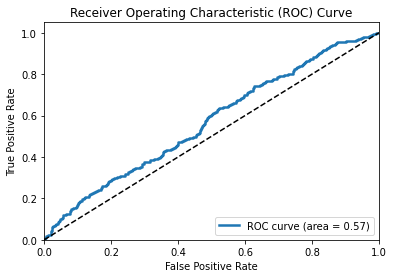

In [6]:
predictions = inception_model.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))
meu.plot_model_roc_curve(inception_model, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1])

In [8]:
#reshape images to fit the models
IMG_DIM = (224, 224)
input_shape = (224, 224, 3)
test_files = glob.glob('data/test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])

Test dataset shape: (948, 224, 224, 3)
['dank', 'dank', 'dank', 'dank', 'dank'] [0, 0, 0, 0, 0]


Model Performance metrics:
------------------------------
Accuracy: 0.5011
Precision: 0.5074
Recall: 0.5011
F1 Score: 0.3649

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    not_dank       0.50      0.96      0.66       474
        dank       0.51      0.04      0.07       474

    accuracy                           0.50       948
   macro avg       0.51      0.50      0.36       948
weighted avg       0.51      0.50      0.36       948


Prediction Confusion Matrix:
------------------------------
                 Predicted:     
                   not_dank dank
Actual: not_dank        457   17
        dank            456   18


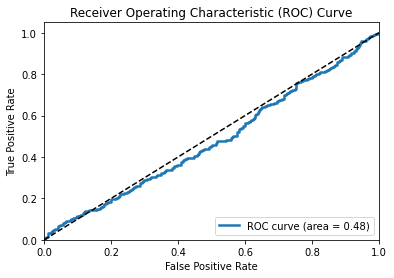

In [9]:
predictions = retrain_lower_dropout.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))
meu.plot_model_roc_curve(retrain_lower_dropout, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.5728
Precision: 0.6209
Recall: 0.5728
F1 Score: 0.5256

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    not_dank       0.54      0.89      0.68       474
        dank       0.70      0.26      0.38       474

    accuracy                           0.57       948
   macro avg       0.62      0.57      0.53       948
weighted avg       0.62      0.57      0.53       948


Prediction Confusion Matrix:
------------------------------
                 Predicted:     
                   not_dank dank
Actual: not_dank        421   53
        dank            352  122


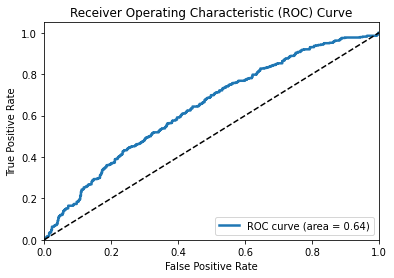

In [10]:
predictions = lower_dropout.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))
meu.plot_model_roc_curve(lower_dropout, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1 Score: 0.3333

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    not_dank       0.00      0.00      0.00       474
        dank       0.50      1.00      0.67       474

    accuracy                           0.50       948
   macro avg       0.25      0.50      0.33       948
weighted avg       0.25      0.50      0.33       948


Prediction Confusion Matrix:
------------------------------
                 Predicted:     
                   not_dank dank
Actual: not_dank          0  474
        dank              0  474


C:\Users\trinh\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\trinh\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


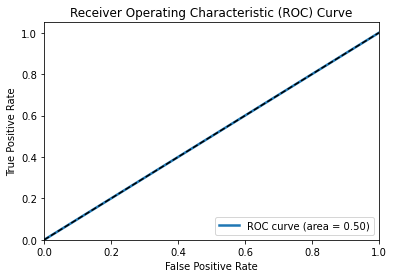

In [11]:
predictions = higher_dropout.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))
meu.plot_model_roc_curve(higher_dropout, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1 Score: 0.3333

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    not_dank       0.50      1.00      0.67       474
        dank       0.00      0.00      0.00       474

    accuracy                           0.50       948
   macro avg       0.25      0.50      0.33       948
weighted avg       0.25      0.50      0.33       948


Prediction Confusion Matrix:
------------------------------
                 Predicted:     
                   not_dank dank
Actual: not_dank        474    0
        dank            474    0


C:\Users\trinh\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\trinh\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


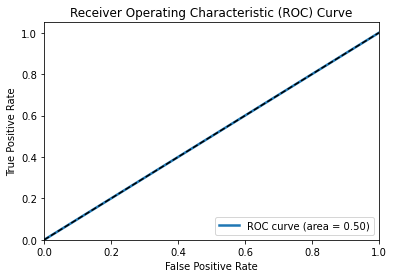

In [12]:
predictions = adam_model.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))
meu.plot_model_roc_curve(adam_model, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.5601
Precision: 0.5949
Recall: 0.5601
F1 Score: 0.5157

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    not_dank       0.54      0.86      0.66       474
        dank       0.65      0.26      0.37       474

    accuracy                           0.56       948
   macro avg       0.59      0.56      0.52       948
weighted avg       0.59      0.56      0.52       948


Prediction Confusion Matrix:
------------------------------
                 Predicted:     
                   not_dank dank
Actual: not_dank        409   65
        dank            352  122


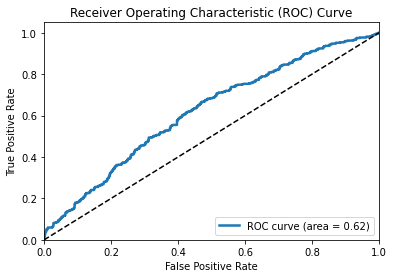

In [15]:
predictions = even_lower_dropout.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))
meu.plot_model_roc_curve(even_lower_dropout, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1])